# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
df = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="left")
df = df[["Mouse ID","Timepoint","Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_metadata['Mouse ID'].size

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df['Mouse ID'][df.duplicated()].to_numpy()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df[ df['Mouse ID'] == df['Mouse ID'][df.duplicated()].to_numpy()[0] ]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df.drop(df[ df['Mouse ID'] == df['Mouse ID'][df.duplicated()].to_numpy()[0] ].index, inplace=True) # save the first occurance and delete the rest
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
# 248 
df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean =  df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
stdErr = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
summary_df = pd.concat([mean, median, var, std, stdErr], axis=1)
summary_df.columns = ["Mean Tumor Volume","Median Tumor Volume","Tumor Volume Variance","Tumor Volume Std. Dev.","Tumor Volume Std. Err."]
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

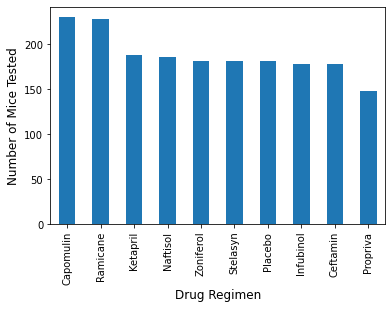

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
df['Drug Regimen'].value_counts().plot.bar()
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Number of Mice Tested', fontsize=12);

In [10]:
df['Drug Regimen'].value_counts().index

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype='object')

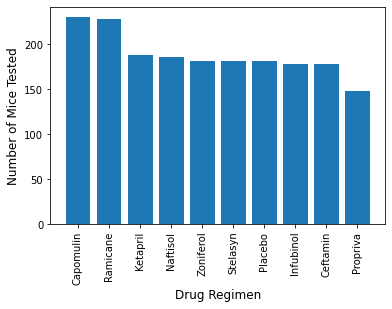

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(df['Drug Regimen'].value_counts().index, df['Drug Regimen'].value_counts())
plt.xlabel('Drug Regimen', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Number of Mice Tested', fontsize=12);

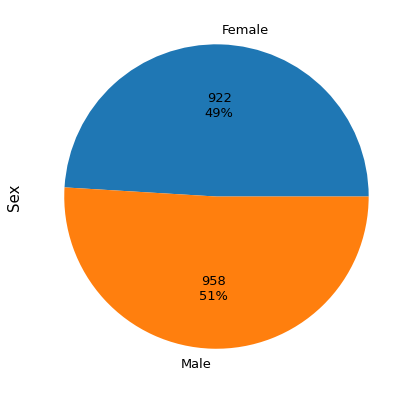

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# df.plot.pie(y='Sex', figsize=(7,7))
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
df.groupby(['Sex']).size().plot(kind='pie', autopct=label_function, figsize=(7,7), textprops={'fontsize': 13})
plt.ylabel('Sex', fontsize=15);

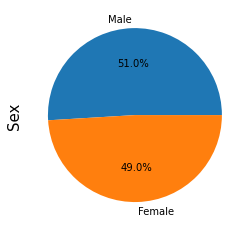

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = df['Sex'].value_counts(normalize=True).values
labels = df['Sex'].value_counts().index.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.ylabel('Sex', fontsize=15);

In [14]:
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
nonduplicated_df = df.groupby('Mouse ID')['Timepoint'].apply( lambda x: x[len(x)-1:len(x)] )

nonduplicated_df = nonduplicated_df.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = nonduplicated_df.merge(df, on=["Mouse ID", "Timepoint"], how="left")
merged_df

,Mouse ID,level_1,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,1804,45,67.973419,2,Infubinol,Female,20,23
1,a251,1786,45,65.525743,1,Infubinol,Female,21,25
2,a262,1783,45,70.717621,4,Placebo,Female,17,29
3,a275,1856,45,62.999356,3,Ceftamin,Female,20,28
4,a366,1401,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...,...
243,z435,499,10,48.710661,0,Propriva,Female,12,26
244,z578,1799,45,30.638696,0,Ramicane,Male,11,16
245,z581,1784,45,62.754451,3,Infubinol,Female,24,25
246,z795,1887,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
desired_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in desired_drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    # print(final_tumor_vol)
    # add subset 
    tumor_volume_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print("{}'s potential outliers: {}".format(drug, outliers))

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


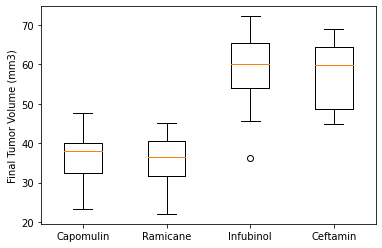

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=desired_drugs)
plt.ylabel('Final Tumor Volume (mm3)');

## Line and Scatter Plots

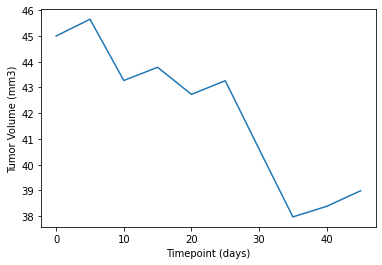

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = df [ (df['Drug Regimen'] == 'Capomulin') & (df['Mouse ID'] == 'b128')]
plt.plot(line_df['Timepoint'], line_df['Tumor Volume (mm3)'],linestyle='solid')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)');

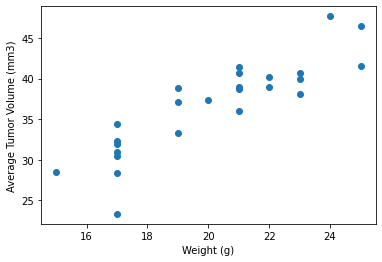

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# get the unique rows that contain the desired values from tumor_volume_data list of Capomulin(index zero from list)
# merged_df.loc[tumor_volume_data[0].index.values, :]['Tumor Volume (mm3)']
weight = merged_df.iloc[tumor_volume_data[0].index.values, :]['Weight (g)'] 
avg_tumor_vol =  merged_df.iloc[tumor_volume_data[0].index.values, :]['Tumor Volume (mm3)']
plt.scatter(weight, avg_tumor_vol)
# plt.scatter(line_df['Weight (g)'], line_df['Tumor Volume (mm3)'].mean())
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)');

## Correlation and Regression

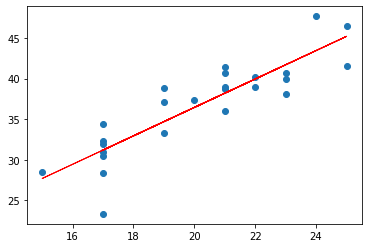

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(weight ,avg_tumor_vol) 
avg_tumor_vol_fit = pe_slope * weight + pe_int 

plt.scatter(merged_df.loc[tumor_volume_data[0].index.values, :]['Weight (g)'] , merged_df.loc[tumor_volume_data[0].index.values, :]['Tumor Volume (mm3)'])
plt.plot(weight, avg_tumor_vol_fit, color="red", linewidth=1);